**Привет!**

Я очень интересуюсь кино, поэтому решила связать проект именно с ним. Мне стало интересно: на что люди опираются (может, и неосознанно), давая фильму какую-то оценку? Думаю, что дать точный и однозначный ответ на этот вопрос нельзя, но какие-то выводы из мини-исследования можно сделать.

Так вот. Чтобы это немного изучить, я решила взять субъективный список рекомендаций (https://www.pravilamag.ru/entertainment/672783-100-luchshih-filmov-vseh-vremen-vybor-amerikanskogo-esquire/) из моего любимого журнала, состоящий из 100 величаший фильмов и составленный как профессиональными критиками и киноведами, так и интересующимися киноманами.

Во-первых, я хочу посмотреть, какие жанры предпочитает публика, каких режиссеров, актеров, фильмы из каких стран пользуются наибольшей популярностью.

Во-вторых, я хочу отдельно сфокусироваться на том, как эти рекомендации связаны (и связаны ли) с наградами премии Оскар. Может, люди, советуя какие-то фильмы, осознанно или нет опираются на хотя бы чем-то подтвержденный статус кинокартины. В этом и состоит моя гипотеза, которую я буду хотя бы косвенно проверять)

# **Собираем данные**

Для начала нам нужно собрать список рекомендаций в одном месте. Для этого воспользуемся библиотекой BeautifulSoup и соберем информацию об оригинальном и русском названиях фильтмов, годе и стране производства, жанре, режиссере и главных актерах

Это все получилось собрать в датафрейм и отдельно в csv файл (output.csv). Файл с кодом (scraping_pm.ipynb) находится в репозитарии.

Пробежимся по тому, как мы собирали данные:

Устанавливаем и открываем необходимые библиотеки:

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Передаем ссылку на сайт, с которого будем собирать данные, и приводим информацию к нужному виду:

In [ ]:
url1 = 'https://www.pravilamag.ru/entertainment/672783-100-luchshih-filmov-vseh-vremen-vybor-amerikanskogo-esquire/'
r1 = requests.get(url1)
soup1 = BeautifulSoup(r1.text)

Отбираем строки, в которых содержатся названия фильмов и год производства:

In [ ]:
films1 = soup1.findAll('div', class_ = 'article-detail_tag_h2')

Создаем список data, в котором будет содержатся нужная информация о фильмах, и сразу добавляем туда оригинальное и русское названия для каждого фильма, а также год производства:

In [ ]:
data = []
for film in films1:
  original = film.text.strip().split(' / ')[0]
  russian = film.text.strip().split(' / ')[1].split('» ')[0]+'»'
  year = film.text.strip().split(' / ')[1].split('» ')[1][1:-1]
  data.append([original, russian, year])

Теперь отбираем строки, в которых содержится информация о жанре, стране, режиссере и актерах:

In [ ]:
need = soup1.findAll('article', class_ = 'article-detail_tag_p')
details = need[3:]

Собираем в отдельные списки нужную информацию:

In [ ]:
countries = []
genres = []
directors = []
actors = []
for i in range(500):
  if i%5 == 0:
    country = details[i].text.split(':')[-1].strip()
    countries.append(country)
  if i%5 == 1:
    genre = details[i].text.split(':')[-1].strip()
    genres.append(genre)
  if i%5 == 2:
    director = details[i].text.split(':')[-1].strip()
    directors.append(director)
  if i%5 == 3:
    people = details[i].text.split(':')[-1].strip()
    actors.append(people)

Наконец, объединяем два блока информации в одном списке data:

In [ ]:
for i in range(100):
  data[i].append(countries[i])
  data[i].append(genres[i])
  data[i].append(directors[i])
  data[i].append(actors[i])

Переведем все это в датафрейм и посмотрим, что у нас получилось:

In [ ]:
header = ['Original name', 'Russian name', 'Year', 'Country', 'Genre', 'Director', 'Actors']
df = pd.DataFrame(data, columns = header)
df

,Original name,Russian name,Year,Country,Genre,Director,Actors
0,The Wolf of Wall Street,«Волк с Уолл-стрит»,2013,США,"драма, криминал, биография",Мартин Скорсезе,"Леонардо ДиКаприо, Джона Хилл, Марго Робби"
1,Rocky,«Рокки»,1976,США,"драма, спорт",Джон Г. Эвилдсен,"Сильвестр Сталлоне, Талия Шайр, Берт Янг"
2,The Karate Kid,«Парень-каратист»,1984,США,"драма, спорт, семейный",Джон Г. Эвилдсен,"Ральф Маччио, Пэт Морита, Элизабет Шу"
3,Good Will Hunting,«Умница Уилл Хантинг»,1997,США,"драма, мелодрама",Гас Ван Сент,"Мэтт Дэймон, Робин Уильямс, Бен Аффлек"
4,8 Mile,«Восьмая миля»,2002,США,"драма, музыка",Кёртис Хэнсон,"Эминем, Ким Бейсингер, Бриттани Мерфи"
...,...,...,...,...,...,...,...
95,Raiders of the Lost Arc,«Индиана Джонс: В поисках утраченного ковчега»,1981,США,"приключения, боевик, комедия",Стивен Спилберг,"Харрисон Форд, Карен Аллен, Пол Фримен"
96,Back to the Future,«Назад в будущее»,1985,США,"фантастика, комедия, приключения",Роберт Земекис,"Майкл Дж. Фокс, Кристофер Ллойд, Лиа Томпсон"
97,Boyz in the Hood,«Ребята по соседству»,1991,США,"драма, криминал",Джон Синглтон,"Кьюба Гудинг мл., Айс Кьюб, Моррис Честнат"
98,Lady Bird,«Леди Бёрд»,2017,США,"драма, комедия",Грета Гервиг,"Сирша Ронан, Лори Меткаф, Трэйси Леттс"


Хм, кажется, составители списка не указали год выпуска фильм "М" Фрица Ланга. Давайте это исправим:

In [ ]:
df['Year'][80] = 1931
df

,Original name,Russian name,Year,Country,Genre,Director,Actors
0,The Wolf of Wall Street,«Волк с Уолл-стрит»,2013,США,"драма, криминал, биография",Мартин Скорсезе,"Леонардо ДиКаприо, Джона Хилл, Марго Робби"
1,Rocky,«Рокки»,1976,США,"драма, спорт",Джон Г. Эвилдсен,"Сильвестр Сталлоне, Талия Шайр, Берт Янг"
2,The Karate Kid,«Парень-каратист»,1984,США,"драма, спорт, семейный",Джон Г. Эвилдсен,"Ральф Маччио, Пэт Морита, Элизабет Шу"
3,Good Will Hunting,«Умница Уилл Хантинг»,1997,США,"драма, мелодрама",Гас Ван Сент,"Мэтт Дэймон, Робин Уильямс, Бен Аффлек"
4,8 Mile,«Восьмая миля»,2002,США,"драма, музыка",Кёртис Хэнсон,"Эминем, Ким Бейсингер, Бриттани Мерфи"
...,...,...,...,...,...,...,...
95,Raiders of the Lost Arc,«Индиана Джонс: В поисках утраченного ковчега»,1981,США,"приключения, боевик, комедия",Стивен Спилберг,"Харрисон Форд, Карен Аллен, Пол Фримен"
96,Back to the Future,«Назад в будущее»,1985,США,"фантастика, комедия, приключения",Роберт Земекис,"Майкл Дж. Фокс, Кристофер Ллойд, Лиа Томпсон"
97,Boyz in the Hood,«Ребята по соседству»,1991,США,"драма, криминал",Джон Синглтон,"Кьюба Гудинг мл., Айс Кьюб, Моррис Честнат"
98,Lady Bird,«Леди Бёрд»,2017,США,"драма, комедия",Грета Гервиг,"Сирша Ронан, Лори Меткаф, Трэйси Леттс"


И еще у трилогии "Три цвета" в качестве года выпуска указан временной промежуток 1993-1994. Давайте оставим один год, поскольку нам в дальнейшем скорее важно, к какому десятилетию относится фильм

In [ ]:
df['Year'][30] = 1993
df

,Original name,Russian name,Year,Country,Genre,Director,Actors
0,The Wolf of Wall Street,«Волк с Уолл-стрит»,2013,США,"драма, криминал, биография",Мартин Скорсезе,"Леонардо ДиКаприо, Джона Хилл, Марго Робби"
1,Rocky,«Рокки»,1976,США,"драма, спорт",Джон Г. Эвилдсен,"Сильвестр Сталлоне, Талия Шайр, Берт Янг"
2,The Karate Kid,«Парень-каратист»,1984,США,"драма, спорт, семейный",Джон Г. Эвилдсен,"Ральф Маччио, Пэт Морита, Элизабет Шу"
3,Good Will Hunting,«Умница Уилл Хантинг»,1997,США,"драма, мелодрама",Гас Ван Сент,"Мэтт Дэймон, Робин Уильямс, Бен Аффлек"
4,8 Mile,«Восьмая миля»,2002,США,"драма, музыка",Кёртис Хэнсон,"Эминем, Ким Бейсингер, Бриттани Мерфи"
...,...,...,...,...,...,...,...
95,Raiders of the Lost Arc,«Индиана Джонс: В поисках утраченного ковчега»,1981,США,"приключения, боевик, комедия",Стивен Спилберг,"Харрисон Форд, Карен Аллен, Пол Фримен"
96,Back to the Future,«Назад в будущее»,1985,США,"фантастика, комедия, приключения",Роберт Земекис,"Майкл Дж. Фокс, Кристофер Ллойд, Лиа Томпсон"
97,Boyz in the Hood,«Ребята по соседству»,1991,США,"драма, криминал",Джон Синглтон,"Кьюба Гудинг мл., Айс Кьюб, Моррис Честнат"
98,Lady Bird,«Леди Бёрд»,2017,США,"драма, комедия",Грета Гервиг,"Сирша Ронан, Лори Меткаф, Трэйси Леттс"


Класс! У нас получилось структурировать информацию из рекомендаций и представить ее в виде датафрейма

А теперь переведем это в csv файл

In [ ]:
df.to_csv('output.csv', sep = ';')

# Анализ полученных данных

Теперь поработаем конкретно с этими данными и посмотрим на них более детально. Может, это поможет сделать предположения о предпочтениях людей в кино)

Сначала давайте посмотрим, фильмы какой страны пользуются популярностью больше всего (тут это и так вполне очевидно, но стоит удостовериться :) ):

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
d = {}
for i in range(100):
  state = df['Country'][i].split(', ')
  for j in range(len(state)):
    if state[j] not in d:
      d[state[j]] = 1
    else:
      d[state[j]] += 1
d

{'США': 84,
 'Австралия': 3,
 'Канада': 4,
 'Корея Южная': 1,
 'Мексика': 3,
 'Великобритания': 10,
 'Франция': 8,
 'Япония': 5,
 'Италия': 4,
 'Испания': 2,
 'Германия (ФРГ)': 1,
 'Польша': 1,
 'Швейцария': 1,
 'Новая Зеландия': 1,
 'Китай': 1,
 'Тайвань': 1,
 'Гонконг': 1,
 'Германия': 1}

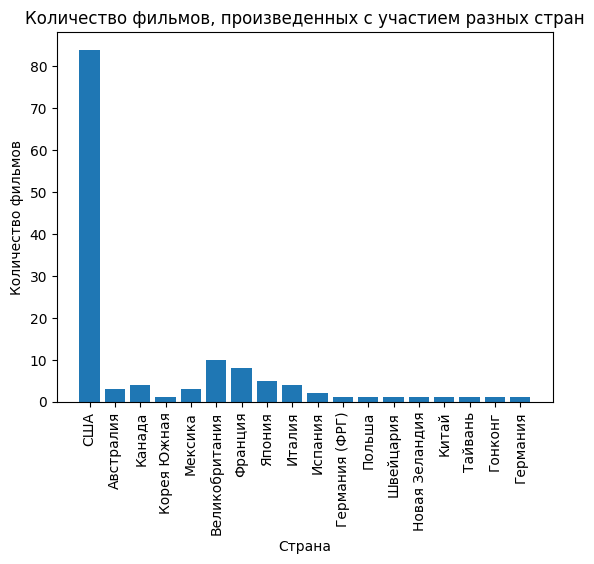

In [ ]:
countries = list(d.keys())
counts = list(d.values())

plt.bar(countries, counts)
plt.xticks(rotation = 90)

plt.xlabel('Страна')
plt.ylabel('Количество фильмов')
plt.title('Количество фильмов, произведенных с участием разных стран')

plt.show()

Как видим, больше всего фильмов из рекомендованных было произведено в США, как можно было ожидать. На втором месте - Великобритания, на третьем - Франция. Меньше всего фильмов (по одному) было произведено в нескольких странах (например, в Германии, Гонконге, Китае и др.)

Теперь посмотрим, какие режиссеры пользуются большей популярностью:

In [ ]:
authors = {}
for i in range(100):
  dir = df['Director'][i].split(', ')
  for j in range(len(dir)):
    if dir[j] not in authors:
      authors[dir[j]] = 1
    else:
      authors[dir[j]] += 1

authors_1 = {}

authors_1['Другие'] = 0

for item in authors:
  if authors[item] >1:
    authors_1[item] = authors[item]
  else:
    authors_1['Другие'] +=1

authors_1

{'Другие': 77,
 'Мартин Скорсезе': 3,
 'Джон Г. Эвилдсен': 3,
 'Роберт Земекис': 2,
 'Барри Дженкинс': 2,
 'Энг Ли': 2,
 'Стивен Спилберг': 3,
 'Джеймс Кэмерон': 2,
 'Стэнли Кубрик': 2,
 'Ридли Скотт': 2,
 'Райан Куглер': 2,
 'Квентин Тарантино': 2,
 'Джон Хьюстон': 2,
 'Чарльз Чаплин': 2}

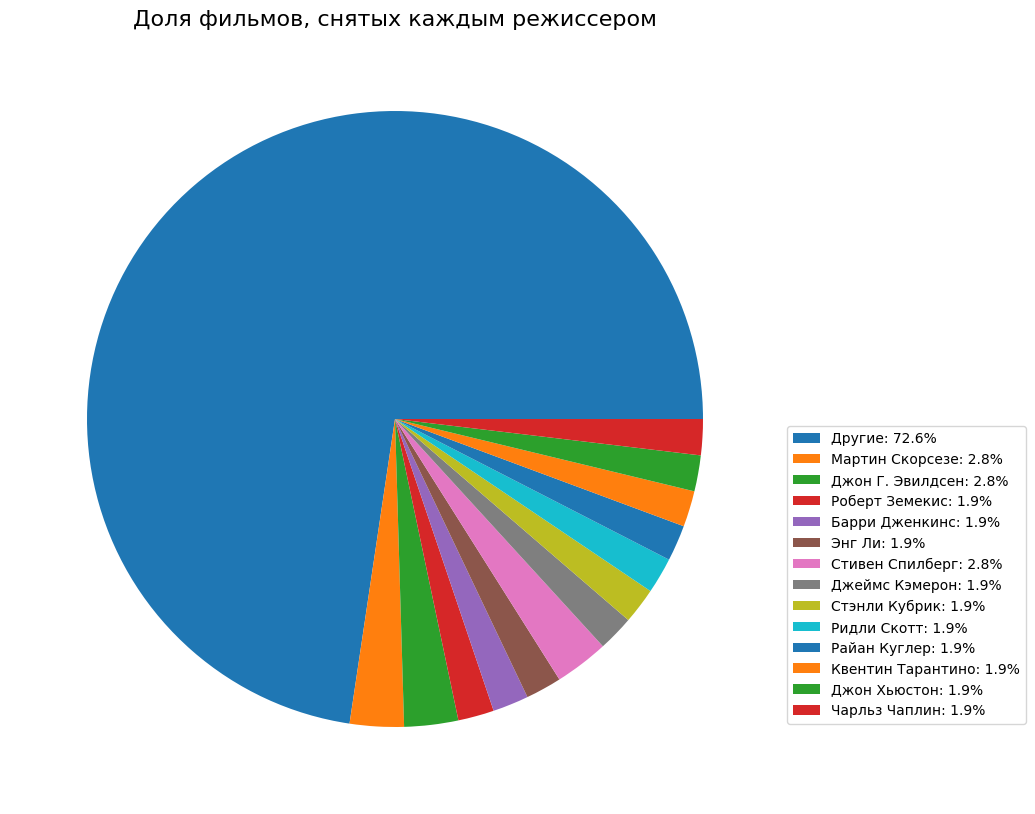

In [ ]:
dirs = list(authors_1.keys())
counts = list(authors_1.values())

total_movies = sum(counts)
percentages = [count / total_movies * 100 for count in counts]

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(percentages, labels=None, autopct=None)

labels = [f'{dir}: {pct:.1f}%' for dir, pct in zip(dirs, percentages)]

ax.legend(loc='best', bbox_to_anchor=(1, 0.5), labels=labels)

plt.title('Доля фильмов, снятых каждым режиссером', fontsize=16)

plt.show()

В целом, предпочтения относительно режиссеров распределены достаточно равномерно: нет никого, кто бы сильно выделялся среди остальных. Среди лидеров - Мартин Скорсезе и Джон Г. Эвилдсен, чьи три фильма вошли в топ.

Ну а что с актерами? Проделаем аналогичную работу

In [ ]:
artists = {}
for i in range(100):
  art = df['Actors'][i].split(', ')
  for j in range(len(art)):
    if art[j] not in artists:
      artists[art[j]] = 1
    else:
      artists[art[j]] += 1

artists_1 = {}

artists_1['Другие'] = 0

for item in artists:
  if artists[item] >1:
    artists_1[item] = artists[item]
  else:
    artists_1['Другие'] +=1

artists_1

{'Другие': 267,
 'Леонардо ДиКаприо': 2,
 'Сильвестр Сталлоне': 3,
 'Кэри Элвес': 2,
 'Марлон Брандо': 2,
 'Джек Леммон': 2,
 'Ли Дж. Кобб': 2,
 'Сигурни Уивер': 2,
 'Джон Туртурро': 2,
 'Роберт Де Ниро': 2,
 'Харрисон Форд': 2,
 'Том Скеррит': 2,
 'Майкл Б. Джордан': 2,
 'Лупита Нионго': 2,
 'Харви Кейтель': 2,
 'Хамфри Богарт': 2,
 'Кэрри-Энн Мосс': 2}

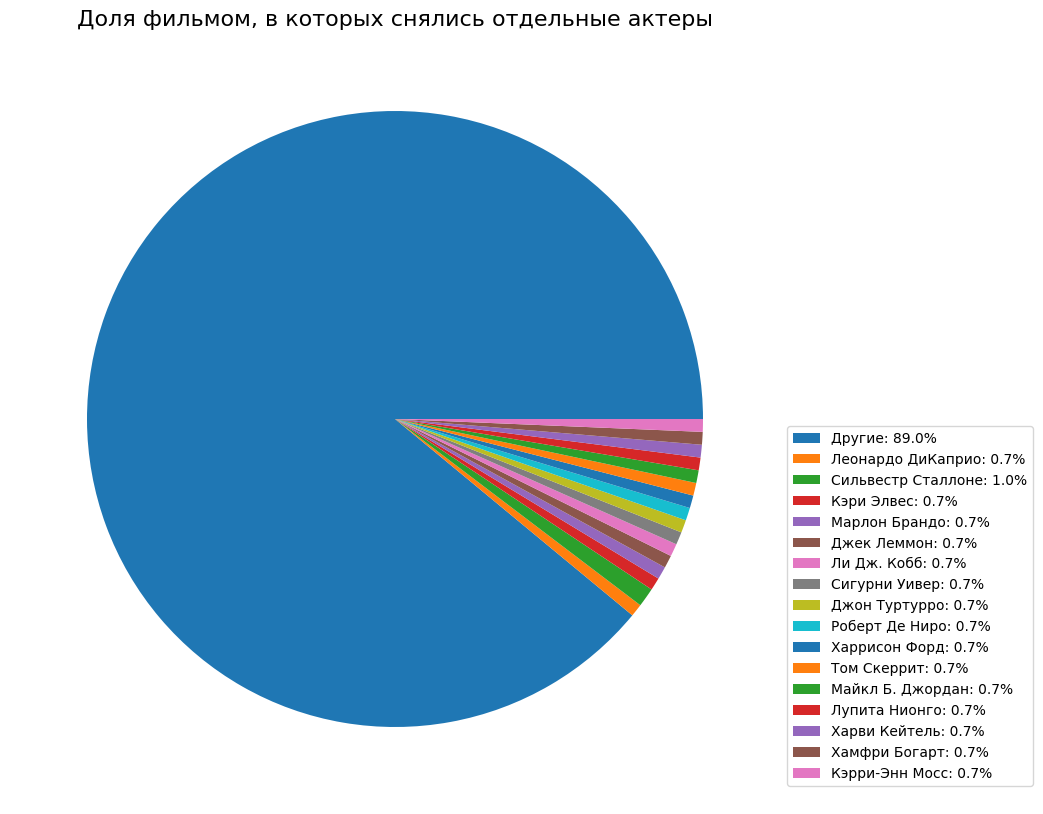

In [ ]:
acts = list(artists_1.keys())
counts = list(artists_1.values())

total_movies = sum(counts)
percentages = [count / total_movies * 100 for count in counts]

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(percentages, labels=None, autopct=None)

labels = [f'{act}: {pct:.1f}%' for act, pct in zip(acts, percentages)]

ax.legend(loc='best', bbox_to_anchor=(1, 0.5), labels=labels)

plt.title('Доля фильмом, в которых снялись отдельные актеры', fontsize=16)

plt.show()

В целом, особых явных педпочтений тоже нет. Лидером оказался Сильвестр Сталлоне. На вторых местах - те, кто помечен в легенде

Теперь посмотрим распределение по годам производства/выпуска фильмов

In [ ]:
for i in range(100):
  df['Year'][i] = int(df['Year'][i])

df

,Original name,Russian name,Year,Country,Genre,Director,Actors
0,The Wolf of Wall Street,«Волк с Уолл-стрит»,2013,США,"драма, криминал, биография",Мартин Скорсезе,"Леонардо ДиКаприо, Джона Хилл, Марго Робби"
1,Rocky,«Рокки»,1976,США,"драма, спорт",Джон Г. Эвилдсен,"Сильвестр Сталлоне, Талия Шайр, Берт Янг"
2,The Karate Kid,«Парень-каратист»,1984,США,"драма, спорт, семейный",Джон Г. Эвилдсен,"Ральф Маччио, Пэт Морита, Элизабет Шу"
3,Good Will Hunting,«Умница Уилл Хантинг»,1997,США,"драма, мелодрама",Гас Ван Сент,"Мэтт Дэймон, Робин Уильямс, Бен Аффлек"
4,8 Mile,«Восьмая миля»,2002,США,"драма, музыка",Кёртис Хэнсон,"Эминем, Ким Бейсингер, Бриттани Мерфи"
...,...,...,...,...,...,...,...
95,Raiders of the Lost Arc,«Индиана Джонс: В поисках утраченного ковчега»,1981,США,"приключения, боевик, комедия",Стивен Спилберг,"Харрисон Форд, Карен Аллен, Пол Фримен"
96,Back to the Future,«Назад в будущее»,1985,США,"фантастика, комедия, приключения",Роберт Земекис,"Майкл Дж. Фокс, Кристофер Ллойд, Лиа Томпсон"
97,Boyz in the Hood,«Ребята по соседству»,1991,США,"драма, криминал",Джон Синглтон,"Кьюба Гудинг мл., Айс Кьюб, Моррис Честнат"
98,Lady Bird,«Леди Бёрд»,2017,США,"драма, комедия",Грета Гервиг,"Сирша Ронан, Лори Меткаф, Трэйси Леттс"


In [ ]:
time = {}
for item in df['Year']:
  if item not in time:
    time[item] = 1
  else:
    time[item] += 1

cons = list(range(min(time), max(time)))

for item in cons:
  if item not in time:
    time[item] = 0

time

{2013: 2,
 1976: 1,
 1984: 3,
 1997: 2,
 2002: 1,
 1987: 2,
 1994: 2,
 1964: 1,
 2015: 2,
 1972: 2,
 2016: 1,
 2005: 1,
 1975: 1,
 1967: 2,
 2008: 3,
 2004: 1,
 2019: 1,
 1973: 3,
 1956: 2,
 2018: 3,
 2014: 2,
 1978: 1,
 2017: 6,
 1989: 2,
 1959: 5,
 1966: 1,
 1990: 1,
 1963: 2,
 1993: 2,
 1982: 3,
 1980: 3,
 1941: 2,
 1969: 1,
 1979: 2,
 1957: 1,
 2001: 2,
 1991: 2,
 1962: 1,
 1930: 1,
 1954: 2,
 2006: 1,
 1951: 1,
 1931: 2,
 1947: 1,
 1950: 1,
 2000: 4,
 1939: 2,
 1948: 1,
 1940: 1,
 1934: 1,
 1999: 2,
 1986: 1,
 1992: 1,
 1981: 1,
 1985: 1,
 2010: 1,
 1932: 0,
 1933: 0,
 1935: 0,
 1936: 0,
 1937: 0,
 1938: 0,
 1942: 0,
 1943: 0,
 1944: 0,
 1945: 0,
 1946: 0,
 1949: 0,
 1952: 0,
 1953: 0,
 1955: 0,
 1958: 0,
 1960: 0,
 1961: 0,
 1965: 0,
 1968: 0,
 1970: 0,
 1971: 0,
 1974: 0,
 1977: 0,
 1983: 0,
 1988: 0,
 1995: 0,
 1996: 0,
 1998: 0,
 2003: 0,
 2007: 0,
 2009: 0,
 2011: 0,
 2012: 0}

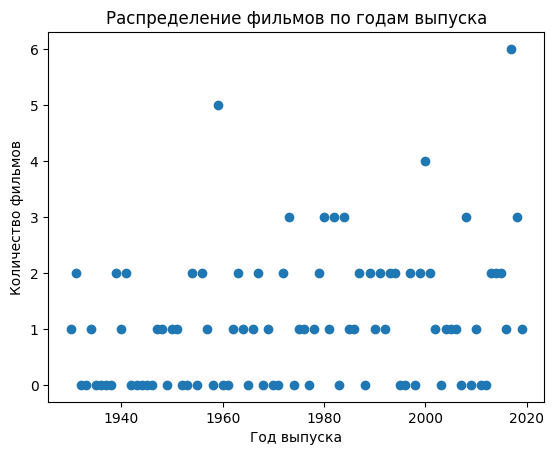

In [ ]:
plt.scatter(list(time.keys()), time.values())

plt.xlabel('Год выпуска')
plt.ylabel ('Количество фильмов')
plt.title('Распределение фильмов по годам выпуска')

plt.show()

Построим еще один график:

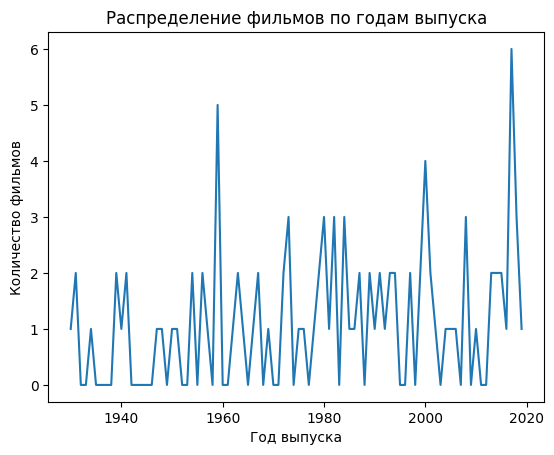

In [ ]:
time_s = dict(sorted(time.items()))


plt.plot(list(time_s.keys()), time_s.values())
plt.xlabel('Год выпуска')
plt.ylabel ('Количество фильмов')
plt.title('Распределение фильмов по годам выпуска')

plt.show()

Конечно, результат тот же. Видим, среди рекомендованных фильмов тех, которые относится к более ранним годам, меньше, так как, во-первых, там есть более длительные участки на уровне 0, а также количество фильмов редко превышало 2.

Далее скачки до уровня 3 фильов становятся все более частыми, а снижения до 0 - более редкими.

Можем заметить, что за каждый год, начиная с 2013 года (до 2019), фильмы есть в списке

Конкретный вывод по предпочтениям относительно года выпуска сделать сложно, но, в целом, наблюдаем, что более поздний период (примерно с 1970-х) более востребованный.

Осталось рассмотреть распределение по жанрам. Проделаем то же, что и с актерами и режиссерами:

In [ ]:
g = {}
for i in range(100):
  g1 = df['Genre'][i].split(', ')
  for j in range(len(g1)):
    if g1[j] not in g:
      g[g1[j]] = 1
    else:
      g[g1[j]] += 1

g

{'драма': 64,
 'криминал': 22,
 'биография': 6,
 'спорт': 7,
 'семейный': 3,
 'мелодрама': 21,
 'музыка': 1,
 'фэнтези': 10,
 'приключения': 14,
 'комедия': 21,
 'мюзикл': 4,
 'боевик': 18,
 'фантастика': 12,
 'вестерн': 4,
 'триллер': 20,
 'ужасы': 5,
 'детектив': 8,
 'история': 4,
 'военный': 8,
 'фильм-нуар': 1,
 'аниме': 1,
 'мультфильм': 2}

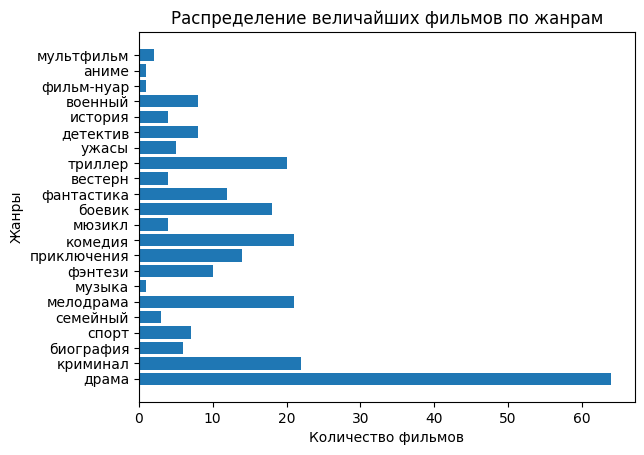

In [ ]:
fig, ax = plt.subplots()

ax.barh(list(g.keys()), list(g.values()), height=0.8)

plt.xlabel('Количество фильмов')
plt.ylabel('Жанры')
plt.title('Распределение величайших фильмов по жанрам')

plt.show()


О, тут что-то поинтереснее)

Сразу видно, что драма является наиболее популярным жанром. Это может быть связано с тем, что фильм никогда не относится к только одному конкретному жанру. Зачастую ставится вопрос типа "Комедия или драма?", поэтому фильмы, не считающиеся веселыми и смешными, автоматически относят ко второму типу.

На втором месте криминал, на третьем - комедия и мелодрама. В целом, довольно ожидаемо: основные жанры стали лидерами в рейтинге. Однако, на мой взгляд, неожиданно, что криминал занял аж второе место (так как снять некринжовый и оригинальный криминальный фильм не так уж просто, хотя жанр реально крутой!).

Меньше всего среди рекомендаций стречаются мюзиклы, аниме, фильмы в жанре нуар.

Таким образом, давая рекомендации, эксперты и киноманы однозначно отдали предпочтение драме.

Кажется, предпочтения относительно основных параметров фильма мы рассмотрели. Более или менее однозначные тренды выделяются при анализе жанра и года выпуска фильма, а вот про создателей фильмов и их роли в этом списке рекомендаций пока сказать что-то конкретное сложно.

# Собираем данные 2.0

Составленный для статьи список рекомендаций не выдает каких-то особых предпочтений относительно создателей фильмов. Вероятно, авторы рекомендаций старались сделать их более разнообразными и подходящими для людей с разными вкусами. Но ведь на что-то же люди опираются, когда рекомендуют кинокартины? Неужели просто на свой вкус?

Мой вариант - регалии и премии, связанные с самими фильмами и их авторами. Как я говорила ранее, остановимся на премии Оскар. Для этого необходимо собрать данные о ее лауреатах

Разных номинаций у премии довольно много, поэтому остановимся на основных: лучший фильм, лучший режиссер, лучшая мужская роль, лучшая женская роль, лучший сценарий

Собираем данные относительно лучших фильмов:

In [ ]:
data_f = []

for i in range(1,5):
  url1_f = f'https://kino.mail.ru/awards/oscar/nomination/1/?page={i}'
  r1_f = requests.get(url1_f)
  soup1_f = BeautifulSoup(r1_f.text)
  oscars = soup1_f.findAll('div', class_ = 'awardnomination__items__win')
  for film in oscars:
    name = film.find('div', class_ = 'margin_top_x3').text
    data_f.append(name)

data_f

['Оппенгеймер',
 'Все везде и сразу',
 'CODA: Ребенок глухих родителей',
 'Земля кочевников',
 'Паразиты',
 'Зеленая книга',
 'Форма воды',
 'Лунный свет',
 'В центре внимания',
 'Бердмэн',
 '12 лет рабства',
 'Операция «Арго»',
 'Артист',
 'Король говорит!',
 'Повелитель бури',
 'Миллионер из трущоб',
 'Старикам тут не место',
 'Отступники',
 'Столкновение',
 'Малышка на миллион',
 'Властелин колец: Возвращение короля',
 'Чикаго',
 'Игры разума',
 'Гладиатор',
 'Красота по-американски',
 'Влюбленный Шекспир',
 'Титаник',
 'Английский пациент',
 'Храброе сердце',
 'Форрест Гамп',
 'Список Шиндлера',
 'Непрощенный',
 'Молчание ягнят',
 'Танцующий с волками',
 'Шофер мисс Дэйзи',
 'Человек дождя',
 'Последний император',
 'Взвод',
 'Из Африки',
 'Амадей',
 'Язык нежности',
 'Ганди',
 'Огненные колесницы',
 'Обыкновенные люди',
 'Крамер против Крамера',
 'Охотник на оленей',
 'Энни Холл',
 'Рокки',
 'Пролетая над гнездом кукушки',
 'Крестный отец 2',
 'Афера',
 'Крестный отец',
 'Французс

Получили список фильмов, которые лауретами премии Оскар за лучший фильм. Проделаем то же самое с остальными номинациями

Собираем данные про лучших режиссеров:

In [ ]:
data_d = []

for i in range(1,5):
  url1_d = f'https://kino.mail.ru/awards/oscar/nomination/5/?page={i}'
  r1_d = requests.get(url1_d)
  soup1_d = BeautifulSoup(r1_d.text)
  oscars = soup1_d.findAll('div', class_ = 'text text_light_medium text_fixed margin_top_10')
  for film in oscars:
    name = film.text
    data_d.append(name)

data_d

['Кристофер Нолан',
 'Дэниэл Шайнерт',
 'Дэн Кван',
 'Джейн Кэмпион',
 'Хлоя Чжао',
 'Пон Джун-хо',
 'Альфонсо Куарон',
 'Гильермо дель Торо',
 'Дэмьен Шазелл',
 'Алехандро Гонсалес Иньярриту',
 'Алехандро Гонсалес Иньярриту',
 'Альфонсо Куарон',
 'Энг Ли',
 'Мишель Хазанавичус',
 'Том Хупер',
 'Кэтрин Бигелоу',
 'Дэнни Бойл',
 'Итан Коэн',
 'Джоэл Коэн',
 'Мартин Скорсезе',
 'Энг Ли',
 'Клинт Иствуд',
 'Питер Джексон',
 'Роман Полански',
 'Рон Ховард',
 'Стивен Содерберг',
 'Сэм Мендес',
 'Стивен Спилберг',
 'Джеймс Кэмерон',
 'Энтони Мингелла',
 'Мэл Гибсон',
 'Роберт Земекис',
 'Стивен Спилберг',
 'Клинт Иствуд',
 'Джонатан Демме',
 'Кевин Костнер',
 'Оливер Стоун',
 'Барри Левинсон',
 'Бернардо Бертолуччи',
 'Оливер Стоун',
 'Сидни Поллак',
 'Милош Форман',
 'Джеймс Л. Брукс',
 'Ричард Аттенборо',
 'Уоррен Битти',
 'Роберт Редфорд',
 'Роберт Бентон',
 'Майкл Чимино',
 'Вуди Аллен',
 'Джон Г. Эвилдсен',
 'Милош Форман',
 'Френсис Форд Коппола',
 'Джордж Рой Хилл',
 'Боб Фосси',
 'Уи

Собираем данные про лауреатов за лучшую мужскую роль:



In [ ]:
data_m = []

for i in range(1,5):
  url1_m = f'https://kino.mail.ru/awards/oscar/nomination/2/?page={i}'
  r1_m = requests.get(url1_m)
  soup1_m = BeautifulSoup(r1_m.text)
  oscars = soup1_m.findAll('div', class_ = 'text text_light_medium text_fixed margin_top_10')
  for person in oscars:
    name = person.text
    data_m.append(name)

data_m

['Киллиан Мерфи',
 'Брендан Фрейзер',
 'Уилл Смит',
 'Энтони Хопкинс',
 'Хоакин Феникс',
 'Рами Малек',
 'Гари Олдман',
 'Кейси Аффлек',
 'Леонардо ДиКаприо',
 'Эдди Редмэйн',
 'Мэттью Макконахи',
 'Дэниэл Дэй-Льюис',
 'Жан Дюжарден',
 'Колин Ферт',
 'Джефф Бриджес',
 'Шон Пенн',
 'Дэниэл Дэй-Льюис',
 'Форест Уитакер',
 'Филип Сеймур Хоффман',
 'Джейми Фокс',
 'Шон Пенн',
 'Эдриан Броуди',
 'Дензел Вашингтон',
 'Рассел Кроу',
 'Кевин Спейси',
 'Роберто Бениньи',
 'Джек Николсон',
 'Джеффри Раш',
 'Николас Кейдж',
 'Том Хэнкс',
 'Том Хэнкс',
 'Аль Пачино',
 'Энтони Хопкинс',
 'Джереми Айронс',
 'Дэниэл Дэй-Льюис',
 'Дастин Хоффман',
 'Майкл Дуглас',
 'Пол Ньюман',
 'Уильям Херт',
 'Ф. Мюррэй Абрахам',
 'Роберт Дювалл',
 'Бен Кингсли',
 'Генри Фонда',
 'Роберт Де Ниро',
 'Дастин Хоффман',
 'Джон Войт',
 'Ричард Дрейфусс',
 'Питер Финч',
 'Джек Николсон',
 'Арт Карни',
 'Джек Леммон',
 'Марлон Брандо',
 'Джин Хэкмен',
 'Джордж К. Скотт',
 'Джон Уэйн',
 'Клифф Робертсон',
 'Род Стайгер',
 

Собираем данные про лауреатов за лучшую женскую роль:


In [ ]:
data_fe = []

for i in range(1,5):
  url1_fe = f'https://kino.mail.ru/awards/oscar/nomination/3/?page={i}'
  r1_fe = requests.get(url1_fe)
  soup1_fe = BeautifulSoup(r1_fe.text)
  oscars = soup1_fe.findAll('div', class_ = 'text text_light_medium text_fixed margin_top_10')
  for person in oscars:
    name = person.text
    data_fe.append(name)

data_fe

['Эмма Стоун',
 'Мишель Йео',
 'Джессика Честейн',
 'Фрэнсис МакДорманд',
 'Рене Зеллвегер',
 'Оливия Колман',
 'Фрэнсис МакДорманд',
 'Эмма Стоун',
 'Бри Ларсон',
 'Джулианна Мур',
 'Кейт Бланшетт',
 'Дженнифер Лоуренс',
 'Мэрил Стрип',
 'Натали Портман',
 'Сандра Буллок',
 'Кейт Уинслет',
 'Марион Котийяр',
 'Хелен Миррен',
 'Риз Уизерспун',
 'Хилари Суэнк',
 'Шарлиз Терон',
 'Николь Кидман',
 'Холли Берри',
 'Джулия Робертс',
 'Хилари Суэнк',
 'Гвинет Пэлтроу',
 'Хелен Хант',
 'Фрэнсис МакДорманд',
 'Сьюзен Сарандон',
 'Джессика Лэнг',
 'Холли Хантер',
 'Эмма Томпсон',
 'Джоди Фостер',
 'Кэти Бейтс',
 'Джессика Тэнди',
 'Джоди Фостер',
 'Шер',
 'Марли Мэтлин',
 'Джеральдин Пейдж',
 'Салли Филд',
 'Ширли МакЛейн',
 'Мэрил Стрип',
 'Кэтрин Хепберн',
 'Сисси Спейсек',
 'Салли Филд',
 'Джейн Фонда',
 'Дайан Китон',
 'Фэй Данауэй',
 'Луиза Флетчер',
 'Эллен Берстин',
 'Гленда Джексон',
 'Лайза Миннелли',
 'Джейн Фонда',
 'Гленда Джексон',
 'Мэгги Смит',
 'Барбра Стрейзанд',
 'Кэтрин Хепб

Собираем данные о фильмах, получивших премию за лучший сценарий:

In [ ]:
data_sc = []

for i in range(1,4):
  url1_sc = f'https://kino.mail.ru/awards/oscar/nomination/8/?page={i}'
  r1_sc = requests.get(url1_sc)
  soup1_sc = BeautifulSoup(r1_sc.text)
  oscars = soup1_sc.findAll('div', class_ = 'margin_top_x3')
  for film in oscars:
    name = film.text
    data_sc.append(name)

data_sc

['Анатомия падения',
 'Все везде и сразу',
 'Белфаст',
 'Девушка, подающая надежды',
 'Паразиты',
 'Зеленая книга',
 'Прочь',
 'Манчестер у моря',
 'В центре внимания',
 'Бердмэн',
 'Она',
 'Король говорит!',
 'Повелитель бури',
 'Харви Милк',
 'Джуно',
 'Маленькая мисс Счастье',
 'Столкновение',
 'Вечное сияние чистого разума',
 'Трудности перевода',
 'Поговори с ней',
 'Госфорд парк',
 'Почти знаменит',
 'Красота по-американски',
 'Влюбленный Шекспир',
 'Умница Уилл Хантинг',
 'Фарго',
 'Подозрительные лица',
 'Пианино',
 'Жестокая игра',
 'Тельма и Луиза',
 'Привидение',
 'Общество мертвых поэтов',
 'Человек дождя',
 'Во власти Луны',
 'Свидетель',
 'Место в сердце',
 'Нежное милосердие',
 'Ганди',
 'Огненные колесницы',
 'Мелвин и Говард',
 'Уходя в отрыв',
 'Возвращение домой',
 'Телесеть',
 'Прерванная мелодия',
 'В порту',
 'Титаник',
 'Сансет бульвар',
 'Поле битвы',
 'Сокровища Сьерра Мадре',
 'Патриот',
 'Казенный дом']

Мы собрали списки фильмов и людей, получивших премии Оскар в основных номинациях. Теперь нужно сравнить эти списки с рекомендациями

# Анализ полученных данных 2.0

Посмотрим, какие фильмы, имеющие Оскар за лучший фильм и/или лучший сценарий присутствуют в списке рекомендаций:

In [ ]:
aha = {}
b_film = []
b_sc = []
for item in df['Russian name']:
  if item[1:-1] in data_f:
    aha[item] = 1
    b_film.append(item)
  if item [1:-1] in data_sc:
    b_sc.append(item)
    if item not in aha:
      aha[item] = 1
    else:
      aha[item] +=1

print(aha)
print(b_film)
print(b_sc)

{'«Рокки»': 1, '«Умница Уилл Хантинг»': 1, '«Форрест Гамп»': 1, '«Крестный отец»': 1, '«Лунный свет»': 1, '«Паразиты»': 2, '«Прочь»': 1, '«Мост через реку Квай»': 1, '«В порту»': 2, '«Все о Еве»': 1, '«Это случилось однажды ночью»': 1, '«Титаник»': 2, '«Повелитель бури»': 2, '«12 лет рабства»': 1}
['«Рокки»', '«Форрест Гамп»', '«Крестный отец»', '«Лунный свет»', '«Паразиты»', '«Мост через реку Квай»', '«В порту»', '«Все о Еве»', '«Это случилось однажды ночью»', '«Титаник»', '«Повелитель бури»', '«12 лет рабства»']
['«Умница Уилл Хантинг»', '«Паразиты»', '«Прочь»', '«В порту»', '«Титаник»', '«Повелитель бури»']


Получается, что 12 фильмов среди рекомендованных имеют Оскар за лучший фильм, 6 - за лучший сценарий


А что с режиссерами?

In [ ]:
b_dir = []
for i in range(100):
  if df['Director'][i] in data_d:
    if df['Russian name'][i] not in aha:
      aha [df['Russian name'][i]] = 1
    else:
      aha [df['Russian name'][i]] += 1
    if df['Director'][i] not in b_dir:
      b_dir.append(df['Director'][i])

print(b_dir)
print(aha)

['Мартин Скорсезе', 'Джон Г. Эвилдсен', 'Роберт Земекис', 'Энг Ли', 'Стивен Спилберг', 'Пон Джун-хо', 'Альфонсо Куарон', 'Уильям Фридкин', 'Джеймс Л. Брукс', 'Джеймс Кэмерон', 'Джон Форд', 'Дэвид Лин', 'Питер Джексон', 'Джон Хьюстон', 'Льюис Майлстоун', 'Элиа Казан', 'Гильермо дель Торо', 'Боб Фосси', 'Билли Уайлдер', 'Джозеф Лео Манкевич', 'Кристофер Нолан', 'Фрэнк Капра', 'Кэтрин Бигелоу']
{'«Рокки»': 2, '«Умница Уилл Хантинг»': 1, '«Форрест Гамп»': 2, '«Крестный отец»': 1, '«Лунный свет»': 1, '«Паразиты»': 3, '«Прочь»': 1, '«Мост через реку Квай»': 2, '«В порту»': 3, '«Все о Еве»': 2, '«Это случилось однажды ночью»': 2, '«Титаник»': 3, '«Повелитель бури»': 3, '«12 лет рабства»': 1, '«Волк с Уолл-стрит»': 1, '«Парень-каратист»': 1, '«Горбатая гора»': 1, '«Челюсти»': 1, '«Спасите тигра»': 1, '«Рома»': 1, '«Изгоняющий дьявола»': 1, '«Телевизионные новости»': 1, '«Терминатор»': 1, '«Бешеный бык»': 1, '«Искатели»': 1, '«Властелин колец»': 1, '«Мальтийский сокол»': 1, '«На Западном фронте

In [113]:
count_dir = 0
for item in df['Director']:
  if item in b_dir:
    count_dir +=1

count_dir

33

Среди рекомендаций есть целых 33 фильма, чьи режиссеры были лауреатами премии за лучшую режиссуру.

Теперь посмотрим, как обстоят дела с актерами. Поскольку в описании к фильмам среди актеров есть как женщины, так и мужчины, сначала объединим лауреатов премии за лучшую мужскую роль и лучшую женскую роль в один список:

In [111]:
data_a = data_fe + data_m
b_act = []

for i in range(100):
  art = df['Actors'][i].split(', ')
  for j in range(len(art)):
    if art[j] in data_a:
      if df['Russian name'][i] not in aha:
        aha [df['Russian name'][i]] = 1
      else:
        aha [df['Russian name'][i]] += 1

      if art[j] not in b_act:
        b_act.append(art[j])


print(aha)
print(b_act)


{'«Рокки»': 2, '«Умница Уилл Хантинг»': 1, '«Форрест Гамп»': 4, '«Крестный отец»': 3, '«Лунный свет»': 1, '«Паразиты»': 3, '«Прочь»': 1, '«Мост через реку Квай»': 4, '«В порту»': 4, '«Все о Еве»': 3, '«Это случилось однажды ночью»': 3, '«Титаник»': 5, '«Повелитель бури»': 3, '«12 лет рабства»': 1, '«Волк с Уолл-стрит»': 2, '«Парень-каратист»': 1, '«Горбатая гора»': 1, '«Челюсти»': 2, '«Спасите тигра»': 2, '«Рома»': 1, '«Изгоняющий дьявола»': 1, '«Телевизионные новости»': 2, '«Терминатор»': 1, '«Бешеный бык»': 2, '«Искатели»': 2, '«Властелин колец»': 1, '«Мальтийский сокол»': 2, '«На Западном фронте без перемен»': 1, '«Лабиринт фавна»': 1, '«Сокровища Сьерра-Мадре»': 2, '«Кабаре»': 2, '«В джазе только девушки»': 2, '«Крадущийся тигр, затаившийся дракон»': 2, '«Злые улицы»': 2, '«Помни»': 1, '«Инопланетянин»': 1, '«Индиана Джонс: В поисках утраченного ковчега»': 1, '«Назад в будущее»': 1, '«Мэри Поппинс»': 1, '«Безумный Макс: Дорога ярости»': 1, '«Душной южной ночью»': 2, '«Железный чело

In [115]:
count_act = 0
help = []

for i in range(100):
  acts = df['Actors'][i].split(', ')
  for person in acts:
    if person in b_act and df['Russian name'][i] not in help:
      help.append(df['Russian name'][i])
      count_act += 1

count_act

31

В 31 фильме снимались актеры, которые имеют Оскар за лучшую мужскую или женскую роль

In [116]:
len(aha)

50

Ага! Ровно половина фильмов среди рекомендованных имеет отношение к главным номинациям на премию Оскар: либо создатели этих фильмов получали премию, либо сам фильм.

Конечно, точно сказать, что при составлении списка величайших фильмов сотрудники журнала и их друзья сильно опирались на то, связан ли фильм как-то с премией Оскар, нельзя. Однако, на мой взгляд, "подтвержденный" статус кинокартины может быть одним из оснований для того, чтобы человек порекомендовал фильм. Так что можно сказать, что гипотеза частично подтвердилась (ну по крайней мере, точно не опроверглась). Естественно, тут нужно проводить более серьезный анализ с более широкой выборкой, но пока работаем с тем, что имеем :)

С данными, которые мы получили, можно играться по-разному и находить любопытные детали. Например, давайте посмотрим, сколько фильмов среди рекомендованных связаны с Оскаром в зависимости от страны:

In [126]:
#Для фильмов, которые никак не связаны с главными номинациями, заполняем значения в словаре нулями:
for item in df['Russian name']:
  if item not in aha:
    aha[item] = 0

In [127]:
df = pd.merge(df, pd.DataFrame(aha.items(), columns=['Russian name', 'Nominations']), on='Russian name', how='left')
df


,Original name,Russian name,Year,Country,Genre,Director,Actors,Genres,Nominations
0,The Wolf of Wall Street,«Волк с Уолл-стрит»,2013,США,"драма, криминал, биография",Мартин Скорсезе,"Леонардо ДиКаприо, Джона Хилл, Марго Робби","[драма, криминал, биография]",2
1,Rocky,«Рокки»,1976,США,"драма, спорт",Джон Г. Эвилдсен,"Сильвестр Сталлоне, Талия Шайр, Берт Янг","[драма, спорт]",2
2,The Karate Kid,«Парень-каратист»,1984,США,"драма, спорт, семейный",Джон Г. Эвилдсен,"Ральф Маччио, Пэт Морита, Элизабет Шу","[драма, спорт, семейный]",1
3,Good Will Hunting,«Умница Уилл Хантинг»,1997,США,"драма, мелодрама",Гас Ван Сент,"Мэтт Дэймон, Робин Уильямс, Бен Аффлек","[драма, мелодрама]",1
4,8 Mile,«Восьмая миля»,2002,США,"драма, музыка",Кёртис Хэнсон,"Эминем, Ким Бейсингер, Бриттани Мерфи","[драма, музыка]",0
...,...,...,...,...,...,...,...,...,...
95,Raiders of the Lost Arc,«Индиана Джонс: В поисках утраченного ковчега»,1981,США,"приключения, боевик, комедия",Стивен Спилберг,"Харрисон Форд, Карен Аллен, Пол Фримен","[приключения, боевик, комедия]",1
96,Back to the Future,«Назад в будущее»,1985,США,"фантастика, комедия, приключения",Роберт Земекис,"Майкл Дж. Фокс, Кристофер Ллойд, Лиа Томпсон","[фантастика, комедия, приключения]",1
97,Boyz in the Hood,«Ребята по соседству»,1991,США,"драма, криминал",Джон Синглтон,"Кьюба Гудинг мл., Айс Кьюб, Моррис Честнат","[драма, криминал]",0
98,Lady Bird,«Леди Бёрд»,2017,США,"драма, комедия",Грета Гервиг,"Сирша Ронан, Лори Меткаф, Трэйси Леттс","[драма, комедия]",0


In [134]:
result = df.groupby('Country').agg({'Nominations': 'sum'})
result

,Nominations
Country,
Австралия,1
Великобритания,0
"Великобритания, США",5
"Великобритания, США, Австралия",1
"Великобритания, Франция, Китай",0
"Великобритания, Франция, США",0
Германия,0
Италия,0
"Италия, Испания, Германия (ФРГ)",0


Получили распределение номинаций по странам. Единственное, некоторые фильмы были произведены с участием нескольких стран, поэтому есть строчки с государствами, перечисленными через запятую. Но тут это не очень-то и важно, результат и так очевиден: фильмы из рекомендаций, произведенные в США, обладают наибольшим количеством номинаций. Удивительно, правда?)

Кстати, а у какого фильма из списка рекомендаций больше всего номинаций?

In [147]:
best = max(aha.values())
for item in aha:
  if aha[item] == best:
    print (item)

«Титаник»


Насколько это было неожиданно?) На мой взгляд, абсолютно заслуженно!

Кстати, а вдруг может быть такое, что люди выбирают рекомендовать фильм, опираясь на то, что он снят по известной книге и даже имеет такое же название? Можем проверить!

Для этого воспользуемся страницей из Википедии, посвященной лучшим романам по версии ВВС, и соберем информацию о книгах (много нам не понадобится)

In [135]:
!pip install scrapy

import scrapy
from scrapy.crawler import CrawlerProcess


class WikiSpider(scrapy.Spider):
    name = 'wikispider'
    start_urls = [
        'https://ru.wikipedia.org/wiki/200_лучших_романов_по_версии_Би-би-си']

    def parse(self, response):
        base_url = 'https://ru.wikipedia.org'
        for book in response.css('table tr:not(:first-child)'):
            title = book.css('td:nth-child(2) a::text').get()
            author = book.css('td:nth-child(3) a::text').get()
            country = book.css('td:nth-child(4) a::text').get()
            link = book.css('td:nth-child(2) a::attr(href)').get()
            yield response.follow(url=base_url + link, callback=self.parse_book, cb_kwargs=dict(title=title, author=author, country=country))

    def parse_book(self, response, title, author, country):
        genre = response.css('th:contains("Жанр") + td span::text').get()

        book_data = {
            'title': title,
            'author': author,
            'country': country,
            'genre': genre,
            }


        yield book_data

process = CrawlerProcess({
    'FEED_FORMAT': 'csv',
    'FEED_URI': 'output1.csv'
})
process.crawl(WikiSpider)
process.start()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.3 MB/s eta 0:00:00


INFO:scrapy.utils.log:Scrapy 2.11.2 started (bot: scrapybot)
2024-06-09 13:48:43 [scrapy.utils.log] INFO: Scrapy 2.11.2 started (bot: scrapybot)
INFO:scrapy.utils.log:Versions: lxml 4.9.4.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.0, Twisted 24.3.0, Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0], pyOpenSSL 24.1.0 (OpenSSL 3.2.1 30 Jan 2024), cryptography 42.0.7, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2024-06-09 13:48:43 [scrapy.utils.log] INFO: Versions: lxml 4.9.4.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.0, Twisted 24.3.0, Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0], pyOpenSSL 24.1.0 (OpenSSL 3.2.1 30 Jan 2024), cryptography 42.0.7, Platform Linux-6.1.85+-x86_64-with-glibc2.35
INFO:scrapy.addons:Enabled addons:
[]
2024-06-09 13:48:43 [scrapy.addons] INFO: Enabled addons:
[]
/usr/local/lib/python3.10/dist-packages/scrapy/utils/request.py:254: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERP

Отдельно файл с кодом для получения данных из Википедии находится в репозитории (Wiki_books).

В этом блоке скрейпинга взяла за основу код из файла https://github.com/Linamamleeva/movies/blob/main/cinema.py (спасибо автору за него!!)

In [142]:
wiki = pd.read_csv('output1.csv')
del wiki ['country']
del wiki ['genre']
wiki

,title,author
0,Гарри Поттер и Кубок огня,Джоан Роулинг
1,1984,Джордж Оруэлл
2,Автостопом по галактике,Дуглас Адамс
3,Убить пересмешника,Харпер Ли
4,Винни Пух,Алан Александр Милн
...,...,...
151,Скотный двор,Джордж Оруэлл
152,Остров сокровищ,Роберт Стивенсон
153,Дневник Трейси Бикер,Жаклин Уилсон
154,Благие знамения,Терри Пратчетт


Честно говоря, были беды со скрейпингом Википедии, поэтому в итоговом датафрейме будет не 200 романов, как в самом списке. В целом, это не так важно: мы посмотрим на те 156, которые получилось положить в датафрейм

Может, среди рекомендаций есть те фильмы, которые сняты по лучшим романам и называются точно так же? Вдруг для людей это важно, когда они оценивают фильм

In [144]:
books = []
for item in df['Russian name']:
  if item[1:-1] in wiki['title']:
    books.append(item)

books

[]

Жаль :(

Возможно, экранизации привлекают людей, но поименное сравнение с названиями книг не очень корректно, так как экранизируют романы часто под другими названиями

# Выводы

Итак, что получилось сделать в проекте:

1) Собрать информацию из самого субъективного списка величайших фильмов

2) Попытаться проанализировать предпочтения составителей

Оказалось, что фильмы из США пользуются большей популярностью, по сравнению с другими странами, а фильмы, выпущенные примерно до 1970 года, - меньше, по сравнению с более поздним периодом.

3) Собрать данные о лауреатах премии Оскар в основных номинациях

4) Сопоставить наличие номинации с местом фильма в списке рекомендованных

Оказалось, что результат 50 на 50: по сути, гипотеза ни подтвердилась, ни опроверглась. Ровно половина фильмов из рекомендованных имеет какие-то номинации.

5) Собрать данные из Википедии о великих романах (почти полностью получилось)

6) Сопоставить эту информацию с анализируемым списком

Тут особых результатов не было, пояснение было в соответствующем блоке

Надеюсь, из моего проекта вам получилось записать себе что-то в список фильмов для будущего просмотра :)